In [2]:
import numpy as np
import matplotlib.pylab as plt

# Korelační a regresní analýza

## Korelační koeficient

Korelační koeficient (libovolný) udává míru [**korelace**](https://en.wikipedia.org/wiki/Correlation_and_dependence) - vzájemné relace - mezi dvěma náhodnými veličinami. [**Lineární, též Pearsonův korelační koeficient**](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) poměřuje míru **lineární závislosti** a je definován vztahem

$$
\rho_{X,Y} = \frac{\operatorname{cov}(X,Y)}{\sqrt{\operatorname{var}X}\sqrt{\operatorname{var}Y}}.
$$

**Výběrový korelační koeficient** je potom nepřekvapivě definován podílem **výběrové kovariance** $s_{X,Y}$ a součinu **výběrových směrodatných odchylek** $s_X$ a $s_Y$.

$$
r_{X,Y} = \frac{s_{X,Y}}{s_X s_Y},
$$

Z minulosti už víme, že 

- nabývá hodnot z intervalu [-1,1]
- nezávislost implikuje hodnotu 0 (pohledem na vzoreček)
- veličiny jsou kladně korelované, pokud s růstem jedné roste druhá
- veličiny jsou záporně korelované, pokud s růstem jedné druhá klesá.

Důležité je toto: **nezávislost $\Longrightarrow$ nekorelovanost**, ne však nutně opačně! Pohledem do obrázku z wikipedie to bude ihned jasné.

![corrwiki](img/corrwiki.png)

[Anscombeho kvartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) je jiným příkladem toho, kde lineární korelační koeficient selže. Zobrazuje 4 datasety se stejnými průměry a výběrovými variancemi obou proměnných, s kladnou korelací $r=0.816$:

![anscombe](img/Anscombe.png)

Jak je patrné, pokud je mezi daty jiná než lineární závislost, lineární korelační koeficient není úplně vhodnou mírou. Proto existuje rovnou celá řada jiných korelačních koeficientů, každý se svými klady a zápory. Např. [Spearmanův](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient), [Kendallovo $\tau$](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)...

### Příklad 12.2

**Buďte $X$ náhodná veličina určující výšku jedince v cm a $Y$ náhodná veličina určující jeho váhu v kg. Vybrali jsme vzorek pěti jedinců v populaci a naměřili jejich výšky a váhy, viz tabulka:**
	
| výška [cm] | 158 | 161 | 168 | 175 | 182 |
|---|---|---|---|---|---|
| váha [kg]  |  55 | 63 | 75 | 71 | 83 |

**a) Na základě těchto hodnot odhadněte korelaci náhodných veličin $X$ a $Y$.**

In [4]:
x = np.array([158, 161, 168, 175, 182])
Y = np.array([55, 63, 75, 71, 83])

sX = x.std(ddof=1)
sY = Y.std(ddof=1)
sXY = np.cov(x, Y)[0,1]
r = sXY / (sX * sY)

print('Odhad r = {0:.3f}'.format(r))
print('Přímo z np.corrcoef: {0:.3f}'.format(np.corrcoef(x, Y)[0,1]))
print(sY)

Odhad r = 0.914
Přímo z np.corrcoef: 0.914
10.807404868885037


**b) Interpretujte výslednou hodnotu korelačního koeficientu.**

Veličiny jsou poměrně silně kladně korelované - s růstem jedné roste i druhá.

## Regresní analýza

Regresní analýza se zabývá **modelováním** náhodné veličiny $Y$ v závislosti na vysvětlující proměnné $x$, jež není v této roli považována za náhodnou. $Y$ se také říká regresand, $x$ často nazýváme regresor či vysvětlující proměnná.

### Lineární regrese

Pro popis jednoduché lineární závislosti používáme lineární regresní model ve tvaru přímky,

$$
Y_i = \alpha + \beta x_i + \varepsilon_i, \qquad i=1,\ldots,n,
$$

kde

- $x_i$ jsou jednotlivé hodnoty regresoru,
- $Y_i$ jsou regresandy,
- $\alpha, \beta$ jsou **neznámé** parametry, nazývané **regresní koeficienty**
- $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$ jsou iid chyby, často nazývané **šum**.

Je patrné, že přesnou lineární závislost $Y$ a $x$ porušuje právě přítomnost náhodné veličiny $\varepsilon_i$. 

Pokud si pod indexem $i$ představíme čas, máme jednoduchý model časového vývoje $Y$ v závislosti na regresoru $x$ čase $i$.

Je zřejmé, že

$$
\operatorname{E}Y_i = \alpha + \beta x_i, \qquad\qquad \operatorname{var}Y_i = \operatorname{var}\varepsilon_i = \sigma^2.
$$

Cílem regresní analýzy je najít odhady $a,b$ koeficientů $\alpha, \beta$ takové, aby aproximace $\hat{Y}_i$ skutečného $Y_i$ byla co nejlepší. Tedy budeme mít

$$
\hat{Y}_i = a + bx_i \qquad\text{s chybou} \qquad e_i = Y_i - \hat{Y}_i.
$$

![regrese](img/regrese.jpg)

K tomu použijeme **metodu nejmenších čtverců** (MNČ, angl. least squares method), která minimalizuje právě součet druhých mocnin zmíněných chyb.

$$
S_e = \sum_{i=1}^n e_i^2.
$$

A protože $e_i$ nazýváme **reziduem**, je $S_e$ **reziduálním součtem čtverců**.


Kdybychom dosadili a hledali minimum $S_e$ derivací, dostali bychom odhady

$$
b = \frac{s_{X,Y}}{s_X^2} = r_{X,Y} \frac{s_Y}{s_X}, \qquad\qquad
a = \bar{Y}_n - b \bar{x}_n.
$$

Odhad parametrů je v praxi jen jedním z kroků analýzy. Následně se zjišťuje, jak model data dobře "fituje" (FITuje ;), například

- testováním hypotéz o koeficientech
- konstrukcí pásu spolehlivosti kolem regresní přímky
- výpočtem koeficientu determinace $R^2$
- atd., pro zajímavost např. porovnáváním několika možných modelů různými kritérii (AIC, BIC...) aj.

## K čemu to všechno je?

Regresní analýza je dost možná v praxi nejčastěji využívaná partie statistiky, neboť díky ní umíme (nebo se snažíme) předpovídat hodnoty burzovních veličin, vývoj počasí, vývoj veličin v průmyslu atd. Samozřejmě k tomu využíváme složitější modely než uvádíme výše. A na FITu je celá řada předmětů, kde se s regresí lze potkat :)

![Melbourne minimum temperatures](img/melbourne.png)
Modelování vývoje minimálních teplot v Melbourne + predikce vč. pásu spolehlivosti.

### Příklad 12.1

**Buďte $X$ náhodná veličina s rovnoměrným rozdělením na intervalu $(-1,1)$ a $a,b,c\in\mathbb{R}$ reálné konstanty.**

**a) Spočtěte korelaci náhodných veličin $X$ a $Y=a+bX$.**

**+b) Spočtěte korelaci náhodných veličin $X$ a $Z=a+bX+cX^2$.**

**Postupujte nejprve pro obecnou n.v. $X$, teprve poté využijte vlastnosti rozdělení $X$.**

Tento příklad je cvičení rozpis variance lineární transformace veličiny. Zejména bod a) je jednoduchý :-)

Výsledky:

a) $\rho_{X,Y} = 1$ pro $b>0$, $\rho_{X,Y} = -1$ pro $b<0$

b) $\rho_{X,Y} = \frac{\operatorname{sgn}(b)}{\sqrt{1+\frac{12}{45}\frac{c^2}{b^2}}}$.

### Příklad 12.3

**Uvažujme naměřená data výšky a váhy z příkladu 12.2**

**a) Nalezněte a načrtněte regresní přímku závislosti váhy na výšce.**

Můžeme využít vzorec $b = r_{X,Y} \frac{s_Y}{s_X}$, koeficient $a$ počítáme stále stejně.

In [61]:
b = r * sY / sX
a = Y.mean() - b * x.mean()
print('Regresní přímka je: Y = {0:.5f} + {1:.5f}x'.format(a, b))

Regresní přímka je: Y = -99.22723 + 0.99898x


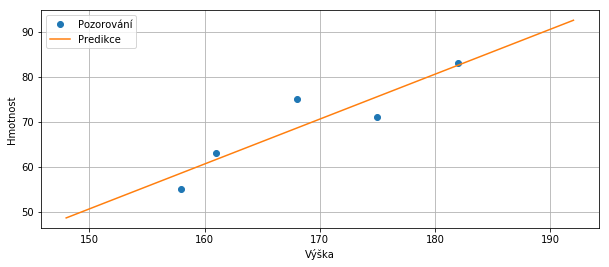

In [73]:
plt.figure(figsize=(10,4))
xi = np.array([x.min()-10, x.max()+10])
yi = a + b*xi
plt.plot(x, Y, 'o', label="Pozorování")
plt.plot(xi, yi, '-', label="Predikce")
plt.xlabel('Výška')
plt.ylabel('Hmotnost')
plt.legend()

**b) Kolik asi váží člověk vysoký 165cm?**

Jednoduše dosadíme do rovnice regresní přímky.

In [75]:
Ypred = a + b * 165
print('Odhad (predikce): {0:.2f}'.format(Ypred))

Odhad (predikce): 65.60


**c) Jak se výsledek změní, budu-li zkoumat závislost výšky na váze?**

Jelikož je korelační koeficient stejný, jen přeházíme $x$ a $Y$.

In [79]:
b = r * sX / sY
a = x.mean() - b * Y.mean()
print('Regresní přímka je dána parametry a` = {0:.5f}, b` = {1:.5f}'.format(a, b))
print('Nový odhad hmotnosti: {0:.2f}kg'.format((165 - a)/b))

Regresní přímka je dána parametry a` = 110.80822, b` = 0.83562
Nový odhad hmotnosti: 64.85kg


### Příklad 12.4

**Zkoumáme závislost průhybu desky v mm na užitém tlaku v MPa. Naměřili jsme:**

|tlak [MPa] ($x_i$)|2|4|6|8|10|
|---|---|---|---|---|---|
|průhyb [mm] ($Y_i$)|14|35|48|61|80|

**a) Najděte odhady koeficientů regresní přímky lineární závislosti.**

In [29]:
x = np.arange(2, 12, 2)
Y = np.array([14, 35, 48, 61, 80])

sXY = np.cov(x, Y)[0,1]
s2X = xi.var(ddof=1)

b = sXY / s2X
a = Y.mean() - b * x.mean()
print('a = {0:.2f}, b = {1:.2f}'.format(a, b))

a = 0.20, b = 7.90


**b) Jak velký musíme použít tlak, abychom dostali průhyb 70 mm?**

In [31]:
x70 = (70 - a) / b
print("Odhad tlaku: {0:.2f}".format(x70))

Odhad tlaku: 8.84


### Příklad 12.5

**V učebně je 25 počítačů. Zkoumáme závislost celkového odběru elektřiny $Y_i$ na počtu zapnutých strojů $x_i$. Provedli jsme měření ve 25 dnech a získali jsme:**

$$
\begin{align*}
&\bar{X}_n=12 \quad \bar{Y}_n=3800\quad s_{X,Y}=\frac{1}{24}\sum_{i=1}^{25}(X_i-\bar X_n)(Y_i-\bar Y_n)= 5000\\
&s_X=\sqrt{\frac{1}{24}\sum_{i=1}^{25}(X_i-\bar X_n)^2}=4\quad s_Y=\sqrt{\frac{1}{24}\sum_{i=1}^{25}(Y_i-\bar Y_n)^2}=1500
\end{align*}
$$


**a) Odhadněmě parametry $\alpha$ a $\beta$ předpokládané lineární regresní závislosti spotřeby na počtu běžících počítačů.**

In [32]:
sXY = 5000
sX = 4
sY = 1500
Xbar = 12
Ybar = 3800

b = sXY / sX**2
a = Ybar - b * Xbar
print('a = {0:.2f}, b = {1:.2f}'.format(a, b))

a = 50.00, b = 312.50


**b) Najděte odhad korelačního koeficientu $\rho(X,Y)$.**

In [33]:
r = sXY/(sX * sY)
print('Výběrový korelační koeficient r = {0:.2f}'.format(r))

Výběrový korelační koeficient r = 0.83


**c) Odhadněte spotřebu pro 40 běžících strojů.**

In [38]:
xi = 40
Yi = a + b * 40
print('Odhad: {0}W'.format(Yi))

Odhad: 12550.0W
